In [2]:
import os
import glob

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tbparse import SummaryReader

2024-10-02 10:25:14.087197: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-02 10:25:14.168571: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-02 10:25:14.190909: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-02 10:25:14.342601: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-02 10:25:15.464506: W tensorflow/compiler/tf2

In [3]:
metrics_cols = ["name", "step", "epoch_loss", "epoch_accuracy", "epoch_precision", "epoch_recall", "epoch_auc", "epoch_prc", "epoch_tn", "epoch_tp", "epoch_fn", "epoch_fp"]
df_all = []

for log_dir in glob.glob("../dataset/logs/**/*"):
    if not os.path.isdir(log_dir):
        continue

    print("Processing:", log_dir)
    reader = SummaryReader(log_dir, pivot=True)

    name = "_".join(log_dir.split("/")[-2:])
    df_summary = reader.tensors.copy().assign(name=name)
    
    df_all.append(df_summary[metrics_cols].iloc[1:, :].dropna())

df_all = pd.concat(df_all, ignore_index=True)
df_all.head()

Processing: ../dataset/logs/sel-10-undersampled_fcn_fl_5/validation
Processing: ../dataset/logs/sel-10-undersampled_fcn_fl_5/train
Processing: ../dataset/logs/sel-10-undersampled_resnet_bias_fl_6/validation
Processing: ../dataset/logs/sel-10-undersampled_resnet_bias_fl_6/train
Processing: ../dataset/logs/all_resnet_bce_1/validation
Processing: ../dataset/logs/all_resnet_bce_1/train
Processing: ../dataset/logs/all_resnet_bce_3/validation
Processing: ../dataset/logs/all_resnet_bce_3/train
Processing: ../dataset/logs/sel-10_resnet_bias_bce_6/validation
Processing: ../dataset/logs/sel-10_resnet_bias_bce_6/train
Processing: ../dataset/logs/sel-10_fcn_fl_3/validation
Processing: ../dataset/logs/sel-10_fcn_fl_3/train
Processing: ../dataset/logs/all-undersampled_resnet_fl_2/validation
Processing: ../dataset/logs/all-undersampled_resnet_fl_2/train
Processing: ../dataset/logs/all_resnet_bias_fl_1/validation
Processing: ../dataset/logs/all_resnet_bias_fl_1/train
Processing: ../dataset/logs/all-un

,name,step,epoch_loss,epoch_accuracy,epoch_precision,epoch_recall,epoch_auc,epoch_prc,epoch_tn,epoch_tp,epoch_fn,epoch_fp
0,sel-10-undersampled_fcn_fl_5_validation,1,0.048648,0.929878,0.903186,0.962979,0.973262,0.96316,6177.0,6633.0,255.0,711.0
1,sel-10-undersampled_fcn_fl_5_validation,2,0.043647,0.940839,0.910838,0.977352,0.977655,0.967819,6229.0,6732.0,156.0,659.0
2,sel-10-undersampled_fcn_fl_5_validation,3,0.038955,0.949042,0.918539,0.985482,0.982461,0.975415,6286.0,6788.0,100.0,602.0
3,sel-10-undersampled_fcn_fl_5_validation,4,0.035606,0.95572,0.930236,0.985337,0.984545,0.978405,6379.0,6787.0,101.0,509.0
4,sel-10-undersampled_fcn_fl_5_validation,5,0.033644,0.958116,0.935181,0.984466,0.985812,0.980361,6418.0,6781.0,107.0,470.0


In [4]:
df_all["name"] = df_all["name"].str.replace("resnet_bias", "resnet-bias")
df_all[["dataset", "model", "loss", "depth", "phase"]] = df_all["name"].str.split("_", expand=True, n=4)
df_all.head()

,name,step,epoch_loss,epoch_accuracy,epoch_precision,epoch_recall,epoch_auc,epoch_prc,epoch_tn,epoch_tp,epoch_fn,epoch_fp,dataset,model,loss,depth,phase
0,sel-10-undersampled_fcn_fl_5_validation,1,0.048648,0.929878,0.903186,0.962979,0.973262,0.96316,6177.0,6633.0,255.0,711.0,sel-10-undersampled,fcn,fl,5,validation
1,sel-10-undersampled_fcn_fl_5_validation,2,0.043647,0.940839,0.910838,0.977352,0.977655,0.967819,6229.0,6732.0,156.0,659.0,sel-10-undersampled,fcn,fl,5,validation
2,sel-10-undersampled_fcn_fl_5_validation,3,0.038955,0.949042,0.918539,0.985482,0.982461,0.975415,6286.0,6788.0,100.0,602.0,sel-10-undersampled,fcn,fl,5,validation
3,sel-10-undersampled_fcn_fl_5_validation,4,0.035606,0.95572,0.930236,0.985337,0.984545,0.978405,6379.0,6787.0,101.0,509.0,sel-10-undersampled,fcn,fl,5,validation
4,sel-10-undersampled_fcn_fl_5_validation,5,0.033644,0.958116,0.935181,0.984466,0.985812,0.980361,6418.0,6781.0,107.0,470.0,sel-10-undersampled,fcn,fl,5,validation


In [5]:
df_all.to_csv("epoch.csv")

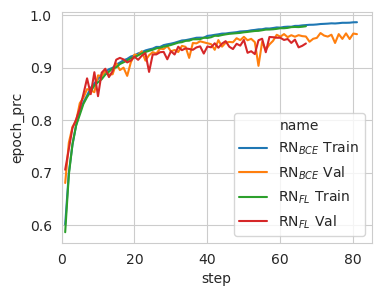

In [5]:
df_plot = df_all[df_all["name"].str.contains("10_resnet")].copy()
df_plot["name"] = df_plot["name"] \
    .str.replace("model-sel-10_", "") \
    .str.replace("model-all_", "") \
    .str.replace("ctrossentropy", "$_{BCE}$") \
    .str.replace("focal", "$_{FL}$") \
    .str.replace("fcn_", "FCN") \
    .str.replace("resnet_", "RN") \
    .str.replace("_validation", " Val") \
    .str.replace("_train", " Train")
df_plot = df_plot.sort_values(by="name", ascending=True)

with sns.axes_style("whitegrid"):
    plt.figure(figsize=(4, 3))
    sns.lineplot(df_plot, x="step", y="epoch_prc", hue="name", legend="brief")
    plt.xlim(0)